## What’s a Character Encoding?

There are tens if not hundreds of character encodings. 

The best way to start understanding what they are is to cover one of the simplest character encodings, ASCII.

Chances are you’ve seen an ASCII table once or twice. 

ASCII is a good place to start learning about character encoding because it is a small and contained encoding. (Too small, as it turns out.)

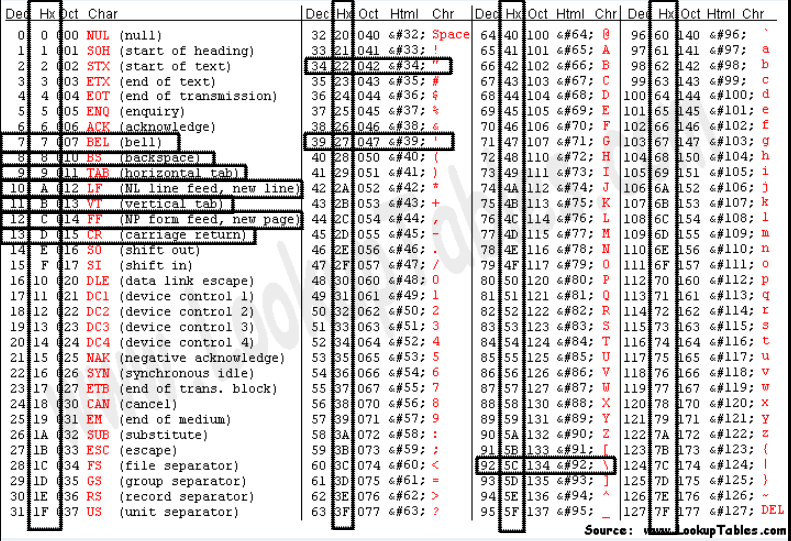

**Table 1** ASCII Table

NOTE: The entire ASCII table contains 128 characters. This table captures the complete character set that ASCII permits. If you don’t see a character here, then you can’t express it as printed text under the ASCII encoding scheme.

It encompasses the following:

   - Lowercase English letters: a through z
   - Uppercase English letters: A through Z
   - Some punctuation and symbols: "$" and "!", to name a couple
   - Whitespace characters: an actual space (" "), as well as a newline, carriage return, horizontal tab, vertical 
     tab, and a few others
   - Some non-printable characters: characters such as backspace, "\b", that can’t be printed literally in the way 
     that the letter A can

## So what is a more formal definition of a character encoding?

At a very high level, **it’s a way of translating characters (such as letters, punctuation, symbols, whitespace, and control characters) to integers and ultimately to bits**. Each character can be encoded to a unique sequence of bits.

The various categories outlined represent groups of characters. Each single character has a corresponding **code point**, which you can think of as just **an integer**. Characters are segmented into different ranges within the ASCII table:

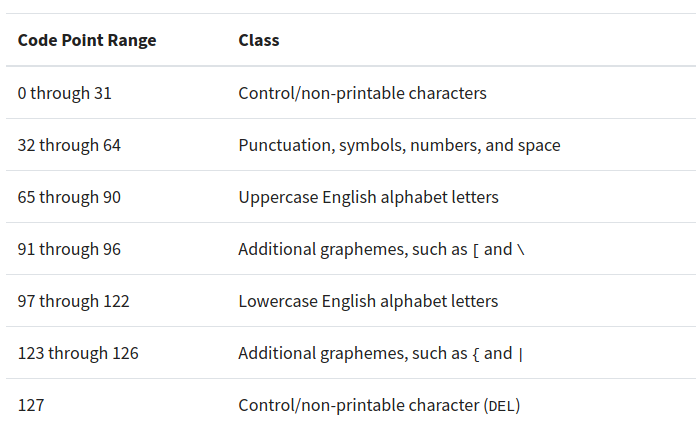

## The string Module

Python’s string module contains the string constants that fall in ASCII’s character set:

In [5]:
# From lib/python3.7/string.py

whitespace = ' \t\n\r\v\f'
ascii_lowercase = 'abcdefghijklmnopqrstuvwxyz'
ascii_uppercase = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
ascii_letters = ascii_lowercase + ascii_uppercase
digits = '0123456789'
hexdigits = digits + 'abcdef' + 'ABCDEF'
octdigits = '01234567'
punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
printable = digits + ascii_letters + punctuation + whitespace

Most of these constants should be self-documenting in their identifier name. 
We’ll cover what hexdigits and octdigits are shortly.

You can use these constants for everyday string manipulation:

In [6]:
import string
s = "What's wrong with ASCII?!?!?"
s.rstrip(string.punctuation)  # ! and ? are stripped off from the right of s

"What's wrong with ASCII"

## A Bit of a Refresher

Now is a good time for a short refresher on the bit, the most fundamental unit of information that a computer knows.

A bit is a signal that has only two possible states. There are different ways of symbolically representing a bit that all mean the same thing:

0 or 1

Our ASCII table from the previous section uses what you and I would just call numbers (0 through 127), 
but what are more precisely called numbers in base 10 (decimal).

Here’s a handy way to represent ASCII strings as sequences of bits in Python. Each character from the ASCII string gets pseudo-encoded into 8 bits, with spaces in between the 8-bit sequences that each represent a single character:

In [8]:
def make_bitseq(s: str) -> str:
    if not s.isascii():  # Note: .isascii() was introduced in Python 3.7.
        raise ValueError("ASCII only allowed")
    return " ".join(f"{ord(i):08b}" for i in s)

make_bitseq("bits")

'01100010 01101001 01110100 01110011'

The f-string f"{ord(i):08b}" uses Python’s Format Specification Mini-Language [2], which is a way of specifying formatting for replacement fields in format strings:

    The left side of the colon, ord(i), is the actual object whose value will be formatted and inserted into the output. Using the Python ord() function gives you the base-10 code point for a single str character.

    The right hand side of the colon is the format specifier. 08 means width 8, 0 padded, and the b functions as a sign to output the resulting number in base 2 (binary).


This trick is mainly just for fun, and it will fail very badly for any character that you don’t see present in the ASCII table. We’ll discuss how other encodings fix this problem later on. 

## We Need More Bits!

There’s a critically important formula that’s related to the definition of a bit. Given a number of bits, n, the number of distinct possible values that can be represented in n bits is 2 power n:

In [18]:
def n_possible_values(nbits: int) -> int:
    return 2 ** nbits

Here’s what that means:
   - 1 bit will let you express 2 to power 1 == 2 possible values.
   - 8 bits will let you express 2 to power 8 == 256 possible values.
   - 64 bits will let you express 2 to power 64 == 18,446,744,073,709,551,616 possible values

There’s a corollary to this formula: given a range of distinct possible values, how can we find the number of bits, n, that is required for the range to be fully represented? What you’re trying to solve for is n in the equation 2 power n = x (where you already know x).

In [13]:
from math import ceil, log
def n_bits_required(nvalues: int) -> int:
    return ceil(log(nvalues) / log(2))

The reason that you need to use a ceiling in n_bits_required() is to account for values that are not clean powers of 2. Say you need to store a character set of 110 characters total. Naively, this should take log(110) / log(2) == 6.781 bits, but there’s no such thing as 0.781 bits. 
110 values will require 7 bits, not 6, with the final slots being unneeded:

In [15]:
n_bits_required(110)

7

All of this serves to to prove one concept: ASCII is, strictly speaking, a 7-bit code. The ASCII table that you saw above contains 128 code points and characters, 0 through 127 inclusive. This requires 7 bits:

In [16]:
# ASCII character set includes 128 characters each of which has a value from 0 to 127
n_bits_required(128)  # 0 through 127

7

In [19]:
# 7 bits can represent up to:
n_possible_values(7)

128

The issue with this is that modern computers don’t store much of anything in 7-bit slots. They traffic in units of 8 bits, conventionally known as a **byte**.

The highest ASCII code point, 127, requires only 7 significant bits:

Knowing this, you can see that make_bitseq() converts ASCII strings into a str representation of bytes, 
where every character consumes one byte:

In [20]:
make_bitseq("bits")

'01100010 01101001 01110100 01110011'

IMPORTANT: ASCII’s underutilization of the 8-bit bytes offered by modern computers led to a family of conflicting encodings that each specified additional characters to be used with the remaining 128 available code points allowed in an 8-bit character encoding scheme.

Not only did these different encodings clash with each other, but each one of them was by itself still a grossly incomplete representation of the world’s characters, regardless of the fact that they made use of one additional bit. 

Over the years, one character encoding mega-scheme came to rule them all. However, before we get there, let’s talk for a minute about **numbering systems**, which are a fundamental base for **character encoding schemes**.

## Covering All the Bases: Other Number Systems

In the discussion of ASCII above, you saw that each character maps to an integer in the range 0 through 127.

This range of numbers is expressed in decimal (base 10). It’s the way that you, me, and the rest of us humans are used to counting, for no reason more complicated than that we have 10 fingers.

But there are other numbering systems as well that are especially prevalent throughout the CPython source code. While the “underlying number” is the same, all numbering systems are just different ways of expressing the same number.

If I asked you what number the string "11" represents, you’d be right to give me a strange look before answering that it represents eleven.

However, this string representation can express different underlying numbers in different numbering systems. In addition to decimal, the alternatives include the following common numbering systems:

  -  Binary: base 2
  -  Octal: base 8
  -  Hexadecimal (hex): base 16


One way to demonstrate how different numbering systems interpret the same thing is with Python’s int() constructor. If you pass a str to int(), Python will assume by default that the string expresses a number in base 10 unless you tell it otherwise:

In [22]:
int('11')

11

In [23]:
int('11', base=10)  # 10 is already default

11

In [24]:
int('11', base=2)  # Binary

3

In [25]:
int('11', base=8)  # Octal

9

In [26]:
int('11', base=16)  # Hex

17

There’s a more common way of telling Python that your integer is typed in a base other than 10. Python accepts literal forms of each of the 3 alternative numbering systems above:

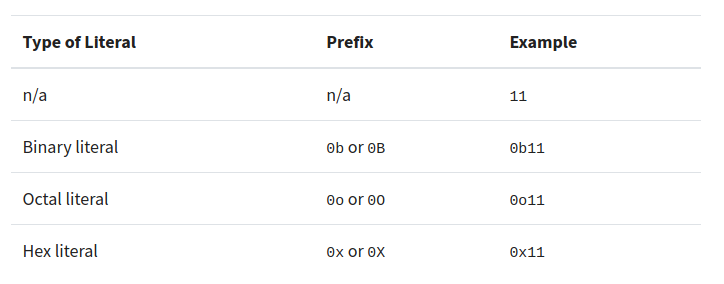

All of these are sub-forms of integer literals. You can see that these produce the same results, respectively, as the calls to int() with non-default base values. They’re all just int to Python:

In [27]:
11

11

In [28]:
0b11  # Binary literal

3

In [29]:
0o11  # Octal literal

9

In [30]:
0x11  # Hex literal

17

## Enter Unicode

As you saw, the problem with ASCII is that it’s not nearly a big enough set of characters to accommodate the world’s set of languages and symbols. It’s not even big enough for English alone.

Think of Unicode as a massive version of the ASCII table—one that has 1,114,112 possible code points. That’s 0 through 1,114,111, or 0 through 17 * (216) - 1, or 0x10ffff hexadecimal. In fact, ASCII is a perfect subset of Unicode. The first 128 characters in the Unicode table correspond precisely to the ASCII characters that you’d reasonably expect them to.

In the interest of being technically exacting, **Unicode itself is not an encoding**. Rather, 
    - Unicode provides unique code points to different character encoding schemes(e.g. UTF-8, UTF-16, UTF-32)
    - An encoding scheme turns each code point to a unique hex value and vice versa.
    
**Unicode is used by different character encodings**, which you’ll see soon. Unicode is better thought of as a map (something like a dict) or a 2-column database table. It maps characters (like "a", "¢", or even "ቈ") to distinct, positive integers/code points. A character encoding needs to offer a bit more.

## Unicode vs UTF-8

It didn’t take long for people to realize that all of the world’s characters could not be packed into one byte each. It’s evident from this that modern, more comprehensive encodings would need to use multiple bytes to encode some characters.

You also saw above that Unicode is not technically a full-blown character encoding. Why is that?

**There is one thing that Unicode doesn’t tell you**: it doesn’t tell you how to get actual bits from text—just code points. **It doesn’t tell you enough about how to convert text to binary data and vice versa**

That’s where UTF-8 and other encoding schemes come into play. The **Unicode standard (a map of characters to code points) defines several different encodings from its single character set**

Note that a character has its own codepoint (in Unicode), which is then translated to hex bytes using UTF-8 encoding:

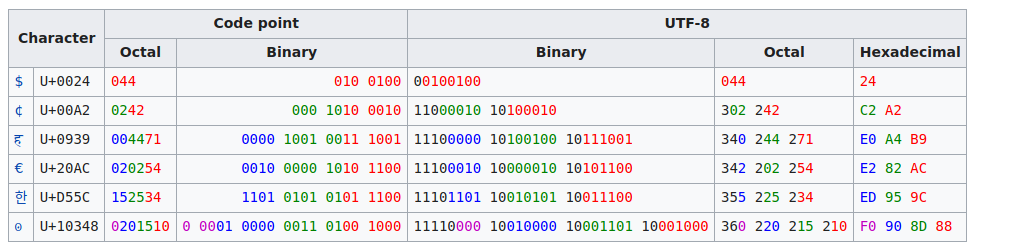

UTF-8 as well as its lesser-used cousins, UTF-16 and UTF-32, are encoding formats for representing Unicode characters as binary data of one or more bytes per character. We’ll discuss UTF-16 and UTF-32 in a moment, but UTF-8 has taken the largest share of the pie by far.

That brings us to a definition that is long overdue. What does it mean, formally, to encode and decode?

## Encoding and Decoding in Python 3

Python 3’s **str** type is meant to represent human-readable text and can contain any Unicode character
**with UTF-8 encoding attached to it**.

The **bytes** type, conversely, represents sequences of raw bytes, that do not have an encoding attached to it

Encoding and decoding is the process of going from one to the other:

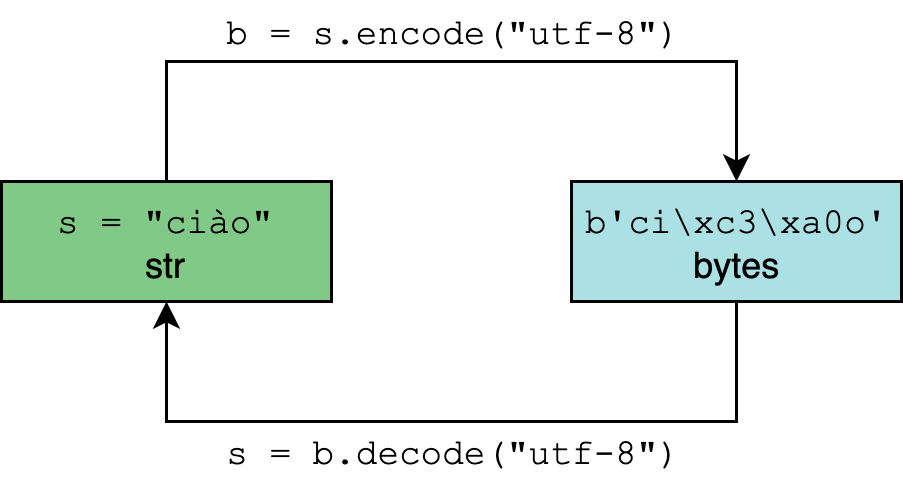

In .encode() and .decode(), the encoding parameter is "utf-8" by default, though it’s generally safer and more unambiguous to specify it:

In [34]:
"El Niño".encode("utf-8")

b'El Ni\xc3\xb1o'

In [35]:
b"El Ni\xc3\xb1o".decode("utf-8")

'El Niño'

The results of str.encode() is a bytes object, where the representations of bytes permit only ASCII characters from 0 to 255.

This is why, when calling "El Niño".encode("utf-8"), the ASCII-compatible "El Ni" is allowed to be represented as it is, but the n with tilde ñ is escaped to "\xc3\xb1". That messy-looking sequence represents two bytes, 0xc3 and 0xb1 in hex:

In [36]:
" ".join(f"{i:08b}" for i in (0xc3, 0xb1))

'11000011 10110001'

## Another example with € sign

Referring to a Unicode to UTF-8 conversion example in [3]:

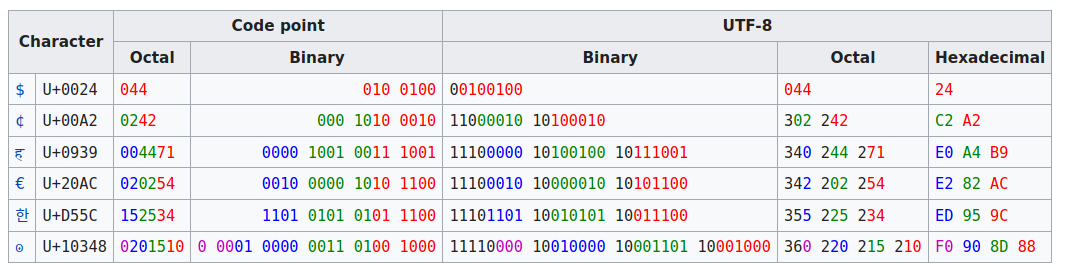

€ has codepoint 0x20AC which is encoded into 0xE282AC in UTF-8. 

If we want to have €'s codepoint:

In [1]:
hex(ord('€'))  # in Unicode table

'0x20ac'

If we want to have €'s value in UTF-8:

In [2]:
'€'.encode('utf-8')

b'\xe2\x82\xac'

If we want to decode € from UTF-8 hex literal:

In [4]:
b'\xe2\x82\xac'.decode('utf-8')

'€'

## Python 3: All-In on Unicode

Python 3 is all-in on Unicode and UTF-8 specifically. Here’s what that means:

(1) Python 3 source code is assumed to be UTF-8 by default


(2) All text (str) is Unicode by default. UTF-8 encoded Unicode text is represented as binary data (bytes). The str type can contain any literal Unicode character, such as "Δv / Δt", all of which will be stored as Unicode:

In [38]:
s = "Δv / Δt"

In [39]:
len(s)

7

In [40]:
s.encode("utf-8")  # Δ is represented by 2 bytes \xce\x94

b'\xce\x94v / \xce\x94t'

In [41]:
b'\xce\x94v / \xce\x94t'.decode("utf-8")

'Δv / Δt'

??? (3) Python’s re module defaults to the re.UNICODE flag rather than re.ASCII. This means, for instance, that r"\w" matches Unicode word characters, not just ASCII letters.

(5) Each platform has its own preferred encoding: 

In [43]:
import locale
locale.getpreferredencoding()

'UTF-8'

## One Byte, Two Bytes, Three Bytes, Four Bytes Encoding:

A crucial feature is that UTF-8 is a variable-length encoding. It’s tempting to gloss over what this means, but it’s worth delving into.

Think back to the section on ASCII. Everything in extended-ASCII-land demands at most one byte of space. You can quickly prove this with the following generator expression:

In [56]:
all(len(chr(codepoint).encode("ascii")) == 1 for codepoint in range(128))

True

UTF-8 is quite different. A given Unicode character can occupy anywhere from one to four bytes. Here’s an example of a single Unicode character taking up four bytes:

In [46]:
ibrow = "🤨"
len(ibrow)

1

In [47]:
ibrow.encode("utf-8")

b'\xf0\x9f\xa4\xa8'

In [48]:
len(ibrow.encode("utf-8"))  #  ibrow character taking up four bytes

4

In [49]:
list(ibrow.encode("utf-8"))

[240, 159, 164, 168]

This is a subtle but important feature of len():

    - The length of a single Unicode character as a Python str will always be 1, no matter how many bytes it 
      occupies.
    - The length of the same character encoded to bytes will be anywhere between 1 and 4.


The table below summarizes what general types of characters fit into each byte-length bucket:

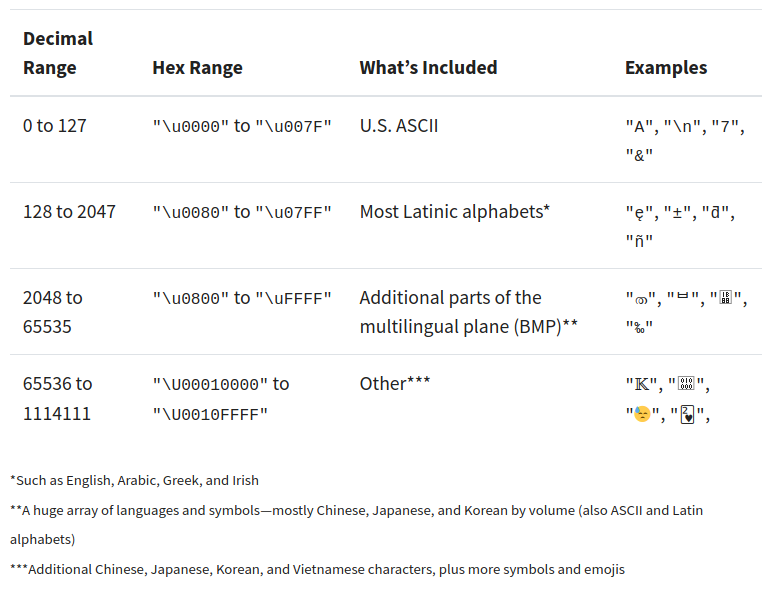

In [51]:
"\u007F"  # ASCII TABLE; del character

'\x7f'

In [57]:
"\u007E"  # ASCII TABLE; ~ character

'~'

## REFERENCES

[1] https://realpython.com/python-encodings-guide/

[2] https://docs.python.org/3/library/string.html#formatspec

[3] https://en.wikipedia.org/wiki/UTF-8